In [5]:
import numpy as np
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import pandas as pd
import os
from scipy.stats import pearsonr
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Mass Densities
# g/cm^3
#gammex
I10_density = 1.031
I7_5_density = 1.029
I5_density = 1.028
I2_5_density = 1.026
I15_density = 1.035

water_density =	1
air_density	=	1.225E-03
pmma_density	=	1.18
polye_density =	0.94
bone_density =	1.92
blood_density = 1.06
adipose_density = 0.95
mendoca_density = 1.3
omnipaque_density = 0.75631 #omni 350
#omni_sal_density = #iohexol + saline mixture


#Accessing folders

base_dir = '/content/drive/MyDrive/Colab_Notebooks/Attenuation_Data'

# Access subdirectories for each kVp folder
folder_80_kvp = os.path.join(base_dir, '80kVp')
folder_100_kvp = os.path.join(base_dir, '100kVp')
folder_120_kvp = os.path.join(base_dir, '120kVp')
folder_135_kvp = os.path.join(base_dir, '135kVp')


files_80_kvp = os.listdir(folder_80_kvp)
files_100_kvp = os.listdir(folder_100_kvp)
files_120_kvp = os.listdir(folder_120_kvp)
files_135_kvp = os.listdir(folder_135_kvp)
print("Files in 80 kVp:", files_80_kvp)
print("Files in 100 kVp:", files_100_kvp)
print("Files in 120 kVp:", files_120_kvp)
print("Files in 135 kVp:", files_135_kvp)


#we can access the txt files from here #test
polyethylene_100_kvp_file = os.path.join(folder_100_kvp, 'Polyethylene_MassAttenuation_100kVp.txt')

with open(polyethylene_100_kvp_file, 'r') as file:
    data = file.read()




Files in 80 kVp: ['Water_MassAttenuation_80kVp.txt', 'PMMA_MassAttenuation_80kVp.txt', 'Polyethylene_MassAttenuation_80kVp.txt', 'Hydroxyapatite_MassAttenuation_80kVp.txt', 'Air_MassAttenuation_80kVp.txt', 'Water_MassAttenuation_80kVp.gdoc', 'I2p5_MassAttenuation_80kVp.txt', 'I7p5_MassAttenuation_80kVp.txt', 'I10_MassAttenuation_80kVp.txt', 'I15_MassAttenuation_80kVp.txt']
Files in 100 kVp: ['Water_MassAttenuation_100kVp.txt', 'PMMA_MassAttenuation_100kVp.txt', 'Polyethylene_MassAttenuation_100kVp.txt', 'Hydroxyapatite_MassAttenuation_100kVp.txt', 'Air_MassAttenuation_100kVp.txt']
Files in 120 kVp: ['Water_MassAttenuation_120kVp.txt', 'PMMA_MassAttenuation_120kVp.txt', 'Polyethylene_MassAttenuation_120kVp.txt', 'Hydroxyapatite_MassAttenuation_120kVp.txt', 'Air_MassAttenuation_120kVp.txt', 'Blood_Mass_Attenuation_120kVp.txt', 'Air_MassAttenuation_120kVp.gdoc', 'Bone_MassAttenuation_120kVp.txt', 'Adipose_MassAttenuation_120kVp.txt', 'Omnipaque350_MassAttenuation_120kVp.txt', 'Omblood_Mas

In [4]:

# Base path to the folder containing the subdirectories
base_folder = '/content/drive/MyDrive/Colab_Notebooks/Attenuation_Data'

# Dictionary to hold attenuation data for each kVp folder (80, 100, etc.)
attenuation_data = {}

# convert to energy and attenuation
# energy in units of MeV
def parse_file_data(file_content):
    energy = []
    attenuation = []
    lines = file_content.strip().splitlines()

    #skip first line which is header
    for line in lines[1:]:
        values = line.split()
        energy.append(float(values[0]))
        attenuation.append(float(values[1]))

    return energy, attenuation

# List of folders (80kVp, 100kVp, 120kVp, etc.)
folders = ['80kVp', '100kVp', '120kVp', '135kVp']  # Add more folders as needed

#get ALL the folders
for folder in folders:
    folder_path = os.path.join(base_folder, folder)
    attenuation_data[folder] = {}

    for file_name in os.listdir(folder_path):
        if file_name.endswith('.txt'):
            file_path = os.path.join(folder_path, file_name)
            print(f"Opening file: {file_name} in {folder}")

            # Open and read the file
            with open(file_path, 'r') as file:
                data = file.read()


            energy, attenuation = parse_file_data(data)


            material_name = file_name.replace(f'_MassAttenuation_{folder}.txt', '')
            attenuation_data[folder][material_name] = {'Energy': energy, 'Mass Attenuation': attenuation}

# Print the organized data to verify for each folder
for folder, materials in attenuation_data.items():
    print(f"\nData for {folder}:")
    for material, data in materials.items():
        print(f"{material} Data (Energy, Mass Attenuation):")
        print("Energy (MeV):", data['Energy'][:5])  # check first 5 so it looks ok
        print("Mass Attenuation (cm^2/g):", data['Mass Attenuation'][:5])  #check first 5








Opening file: Water_MassAttenuation_80kVp.txt in 80kVp
Opening file: PMMA_MassAttenuation_80kVp.txt in 80kVp
Opening file: Polyethylene_MassAttenuation_80kVp.txt in 80kVp
Opening file: Hydroxyapatite_MassAttenuation_80kVp.txt in 80kVp
Opening file: Air_MassAttenuation_80kVp.txt in 80kVp
Opening file: I2p5_MassAttenuation_80kVp.txt in 80kVp
Opening file: I7p5_MassAttenuation_80kVp.txt in 80kVp
Opening file: I10_MassAttenuation_80kVp.txt in 80kVp
Opening file: I15_MassAttenuation_80kVp.txt in 80kVp
Opening file: Water_MassAttenuation_100kVp.txt in 100kVp
Opening file: PMMA_MassAttenuation_100kVp.txt in 100kVp
Opening file: Polyethylene_MassAttenuation_100kVp.txt in 100kVp
Opening file: Hydroxyapatite_MassAttenuation_100kVp.txt in 100kVp
Opening file: Air_MassAttenuation_100kVp.txt in 100kVp
Opening file: Water_MassAttenuation_120kVp.txt in 120kVp
Opening file: PMMA_MassAttenuation_120kVp.txt in 120kVp
Opening file: Polyethylene_MassAttenuation_120kVp.txt in 120kVp
Opening file: Hydroxyap

In [ ]:
#example for accessing PMMA within attenuation_data dictionary
#dictionary access.. i can choose 80, 100 etc

pmma_energy_80 = attenuation_data['80kVp']['PMMA']['Energy']
pmma_attenuation_80 = attenuation_data['80kVp']['PMMA']['Mass Attenuation']


In [ ]:
#need to loop this or do it manually

pmma_attenuation_80_array = np.array(pmma_attenuation_80)
linear_attenuation_80_array = pmma_attenuation_80_array * pmma_density
print (linear_attenuation_80_array)

[0.674252 0.642156 0.61301  0.586578 0.562388 0.54044  0.52038  0.501854
 0.48498  0.469404 0.455008 0.441792 0.42952  0.418192 0.407572 0.397778
 0.388692 0.380196 0.372172 0.364738 0.357776 0.351286 0.34515  0.339368
 0.33394  0.328748 0.32391  0.319426 0.31506  0.31093  0.307036 0.303378
 0.299956 0.296652 0.293466 0.290398 0.287566 0.284852 0.282256 0.279778
 0.2773   0.275058 0.272816 0.270692 0.268686 0.266798 0.26491  0.26314
 0.26137  0.259718 0.258184 0.256532 0.255116 0.253582 0.252284 0.250868
 0.24957  0.248272 0.247092 0.245912 0.244732 0.243552 0.24249  0.241428
 0.240484 0.239422 0.238478 0.237534 0.23659  0.235646 0.23482  0.233876
 0.23305  0.232224 0.231516 0.23069  0.229864 0.229156 0.228448 0.22774
 0.227032 0.226324 0.225616 0.225026 0.224318 0.223728 0.22302  0.22243
 0.22184  0.22125  0.22066  0.22007  0.219598 0.219008 0.218418 0.217946
 0.217356 0.216884 0.216294 0.215822 0.21535  0.214878 0.214406 0.213934
 0.213462 0.21299  0.212518 0.212046 0.211574 0.21122 

In [ ]:
#take density and multiply it by mass attenuation to get linear attenuation
linear_attenuation_data = {}

for folder, materials in attenuation_data.items():
    linear_attenuation_data[folder] = {}
    for material, data in materials.items():
        attenuation_array = np.array(data['Mass Attenuation'])
        material_densities = {'PMMA': pmma_density, 'Water': water_density, 'Air': air_density, 'Polyethylene': polye_density, 'Hydroxyapatite': bone_density, 'Bone': bone_density, 'Blood': blood_density, 'Omnipaque': omnipaque_density}

        if material in material_densities:
            density = material_densities[material]
            linear_attenuation_array = attenuation_array * density


            linear_attenuation_data[folder][material] = linear_attenuation_array

#attenuation values
air_linear_attenuation_80kVp = linear_attenuation_data['80kVp']['Air']
water_linear_attenuation_80kVp = linear_attenuation_data['80kVp']['Water']
pmma_linear_attenuation_80kVp = linear_attenuation_data['80kVp']['PMMA']
polyethylene_linear_attenuation_80kVp = linear_attenuation_data['80kVp']['Polyethylene']
bone_linear_attenuation_80kVp = linear_attenuation_data['80kVp']['Hydroxyapatite']

air_linear_attenuation_100kVp = linear_attenuation_data['100kVp']['Air']
water_linear_attenuation_100kVp = linear_attenuation_data['100kVp']['Water']
pmma_linear_attenuation_100kVp = linear_attenuation_data['100kVp']['PMMA']
polyethylene_linear_attenuation_100kVp = linear_attenuation_data['100kVp']['Polyethylene']
bone_linear_attenuation_100kVp = linear_attenuation_data['100kVp']['Hydroxyapatite']

air_linear_attenuation_120kVp = linear_attenuation_data['120kVp']['Air']
water_linear_attenuation_120kVp = linear_attenuation_data['120kVp']['Water']
pmma_linear_attenuation_120kVp = linear_attenuation_data['120kVp']['PMMA']
polyethylene_linear_attenuation_120kVp = linear_attenuation_data['120kVp']['Polyethylene']
bone_linear_attenuation_120kVp = linear_attenuation_data['120kVp']['Hydroxyapatite']


air_linear_attenuation_135kVp = linear_attenuation_data['135kVp']['Air']
water_linear_attenuation_135kVp = linear_attenuation_data['135kVp']['Water']
pmma_linear_attenuation_135kVp = linear_attenuation_data['135kVp']['PMMA']
polyethylene_linear_attenuation_135kVp = linear_attenuation_data['135kVp']['Polyethylene']
bone_linear_attenuation_135kVp = linear_attenuation_data['135kVp']['Hydroxyapatite']

#data structure so we can use it later
#USE HYDROXYAPATITE for key not bone

#print(air_linear_attenuation_80kVp)



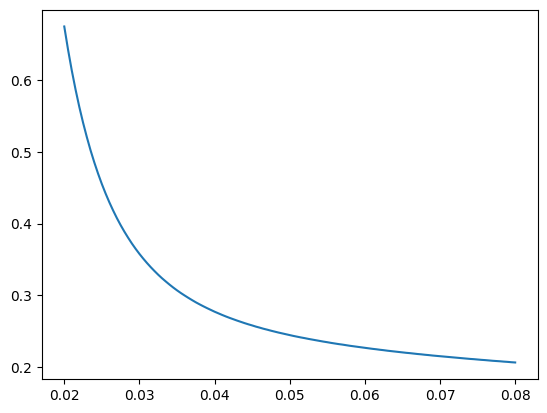

In [ ]:
#test plot
plt.plot(pmma_energy_80,pmma_linear_attenuation_80kVp)

#keys for linear attenuation
#linear_attenuation_data

In [ ]:
#move this up to processing block later
#importing CT number data from txt files
CT_folder = '/content/drive/MyDrive/Colab_Notebooks/CT_Number_Data'

CT_data = {}


for filename in os.listdir(CT_folder):
  if filename.endswith('.txt'):
    filepath = os.path.join(CT_folder, filename)
    with open(filepath, 'r') as file:
      # Extract the kVp value from the filename
      kvp = filename.replace('CT_Number_', '').replace('.txt', '') #get rid of CT number and .txt
      CT_data[kvp] = {}
      next(file)
      for line in file:
        material, ct_number = line.strip().rsplit('\t', 1) #split into ['Water, value]
        CT_data[kvp][material.strip()] = float(ct_number) #remove the tabs


CT_Air_80 = CT_data['80kVp']['Air'] #example of accessing data
type(CT_data['80kVp']['Air']) #checking if it is a float
CT_Air_100 = CT_data['100kVp']['Air']
CT_Air_120 = CT_data['120kVp']['Air']
CT_Air_135 = CT_data['135kVp']['Air']

CT_Water_80 = CT_data['80kVp']['Water']
CT_Water_100 = CT_data['100kVp']['Water']
CT_Water_120 = CT_data['120kVp']['Water']
CT_Water_135 = CT_data['135kVp']['Water']

CT_PMMA_80 = CT_data['80kVp']['PMMA']
CT_PMMA_100 = CT_data['100kVp']['PMMA']
CT_PMMA_120 = CT_data['120kVp']['PMMA']
CT_PMMA_135 = CT_data['135kVp']['PMMA']

CT_Polyethylene_80 = CT_data['80kVp']['Polyethylene']
CT_Polyethylene_100 = CT_data['100kVp']['Polyethylene']
CT_Polyethylene_120 = CT_data['120kVp']['Polyethylene']
CT_Polyethylene_135 = CT_data['135kVp']['Polyethylene']

CT_Hydroxyapatite_80 = CT_data['80kVp']['Hydroxyapatite']
CT_Hydroxyapatite_100 = CT_data['100kVp']['Hydroxyapatite']
CT_Hydroxyapatite_120 = CT_data['120kVp']['Hydroxyapatite']
CT_Hydroxyapatite_135 =CT_data['135kVp']['Hydroxyapatite']

print(CT_data['80kVp']['PMMA']) #checking to see the output is correct


107.234


In [ ]:
#example of data w/ bone

energy_80 = attenuation_data['80kVp']['PMMA']['Energy']
new_array80 = [energy_80, pmma_linear_attenuation_80kVp, air_linear_attenuation_80kVp, water_linear_attenuation_80kVp, polyethylene_linear_attenuation_80kVp]#, bone_linear_attenuation_135kVp]
new_array80 = np.transpose(new_array80)
len(new_array80[2]) #different for air again..

CT_values_80kVp = np.array([CT_PMMA_80, CT_Air_80, CT_Water_80, CT_Polyethylene_80])#, CT_Hydroxyapatite_135])
r_values_80kVp = []

for i in range(len(new_array80)):
  y = CT_values_80kVp
  x = new_array80[i][1:]

  #correlation = (len(CT_values_135kVp)*np.sum(x*y) - np.sum(x)*np.sum(y)) / ((len(CT_values_135kVp)*np.sum(x**2) - np.sum(x)**2)**(0.5) * (len(CT_values_135kVp)*np.sum(y**2) - np.sum(y)**2)**(0.5))
  correlation, p_value = pearsonr(x, y)

  r_values_80kVp.append(correlation)

print('Correlation Value:',max(r_values_80kVp),'\nEffective Energy:',energy_80[r_values_80kVp.index(max(r_values_80kVp))],'MeV','\nP-value:',p_value)


Correlation Value: 0.9997722900049404 
Effective Energy: 0.052 MeV 
P-value: 0.0014980295748667771


In [ ]:
#example of data with bone
energy_100 = attenuation_data['100kVp']['PMMA']['Energy']
new_array2 = [energy_100, pmma_linear_attenuation_100kVp, air_linear_attenuation_100kVp, water_linear_attenuation_100kVp, polyethylene_linear_attenuation_100kVp]#, bone_linear_attenuation_100kVp]
new_array2 = np.transpose(new_array2)


CT_values_100kVp = [CT_PMMA_100, CT_Air_100, CT_Water_100, CT_Polyethylene_100]#, CT_Hydroxyapatite_100]
r_values_100kVp = []

for i in range(len(new_array2)):
  y = CT_values_100kVp
  x = new_array2[i][[1,2,3,4]]

  correlation, p_value = pearsonr(x, y)

  r_values_100kVp.append(correlation)

print('Correlation Value:',max(r_values_100kVp),'\nEffective Energy:',energy_100[r_values_100kVp.index(max(r_values_100kVp))],'MeV','\nP-value:',p_value)




Correlation Value: 0.9998084640248662 
Effective Energy: 0.0575 MeV 
P-value: 0.0012201792101780295


In [ ]:
len()

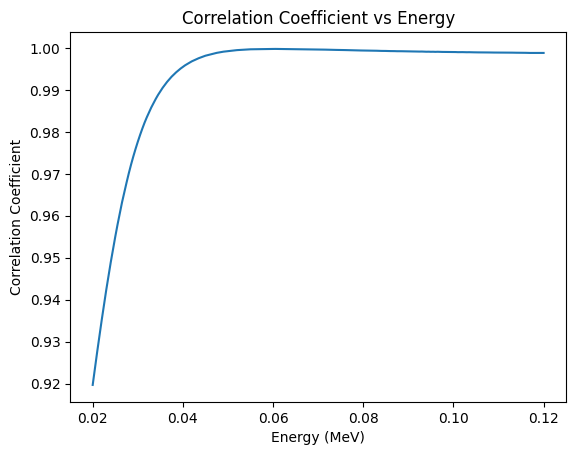

Correlation Value: 0.9997549538034098 
Effective Energy: 0.0605 MeV 
P-value: 0.001200823009176677


In [ ]:
#120
energy_120 = attenuation_data['120kVp']['PMMA']['Energy']
new_array3 = [energy_120, pmma_linear_attenuation_120kVp, air_linear_attenuation_120kVp, water_linear_attenuation_120kVp, polyethylene_linear_attenuation_120kVp]#, bone_linear_attenuation_120kVp]
new_array3 = np.transpose(new_array3)
len(new_array3[2]) #different for air again..

CT_values_120kVp = [CT_PMMA_120, CT_Air_120, CT_Water_120, CT_Polyethylene_120]#, CT_Hydroxyapatite_120]
r_values_120kVp = []

for i in range(len(new_array3)):
  y = CT_values_120kVp
  x = new_array3[i][1:]

  correlation, p_value = pearsonr(x, y)

  r_values_120kVp.append(correlation)

plt.figure()
plt.plot(energy_120, r_values_120kVp)
plt.xlabel('Energy (MeV)')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficient vs Energy')
plt.show()

print('Correlation Value:',max(r_values_120kVp),'\nEffective Energy:',energy_120[r_values_120kVp.index(max(r_values_120kVp))],'MeV','\nP-value:',p_value)

In [ ]:
#135
from sklearn.metrics import mean_squared_error
from scipy.stats import linregress
energy_135 = attenuation_data['135kVp']['PMMA']['Energy']
new_array135 = [energy_135, pmma_linear_attenuation_135kVp, air_linear_attenuation_135kVp, water_linear_attenuation_135kVp, polyethylene_linear_attenuation_135kVp]#, bone_linear_attenuation_135kVp]
new_array135 = np.transpose(new_array135)
len(new_array135[2]) #different for air again..

CT_values_135kVp = np.array([CT_PMMA_135, CT_Air_135, CT_Water_135, CT_Polyethylene_135])#, CT_Hydroxyapatite_135])
r_values_135kVp = []

for i in range(len(new_array135)):
  y = CT_values_135kVp
  x = new_array135[i][1:]

  #correlation = (len(CT_values_135kVp)*np.sum(x*y) - np.sum(x)*np.sum(y)) / ((len(CT_values_135kVp)*np.sum(x**2) - np.sum(x)**2)**(0.5) * (len(CT_values_135kVp)*np.sum(y**2) - np.sum(y)**2)**(0.5))
  correlation, p_value = pearsonr(x, y)

  r_values_135kVp.append(correlation)

print('Correlation Value:',max(r_values_135kVp),'\nEffective Energy:',energy_135[r_values_135kVp.index(max(r_values_135kVp))],'MeV\n', 'Energy Level: 135kVp', '\nP-value:',p_value)

Correlation Value: 0.9997774163491602 
Effective Energy: 0.0625 MeV
 Energy Level: 135kVp 
P-value: 0.0010798537014478082


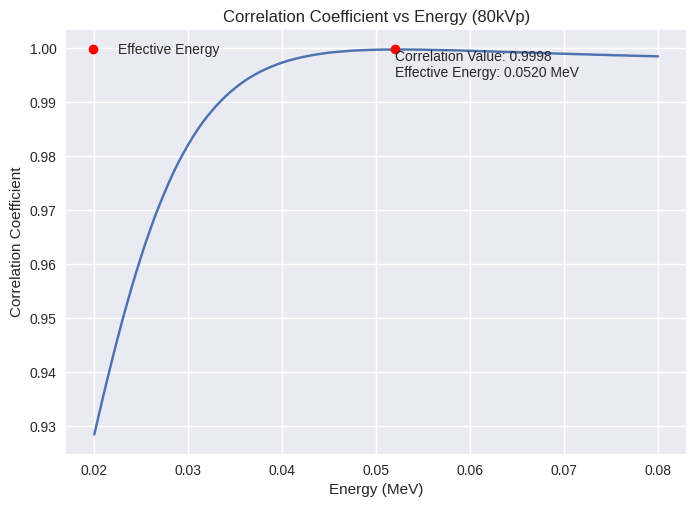

Correlation Value: 0.9997722900049404
Effective Energy: 0.052 MeV
Energy Level: 80kVp


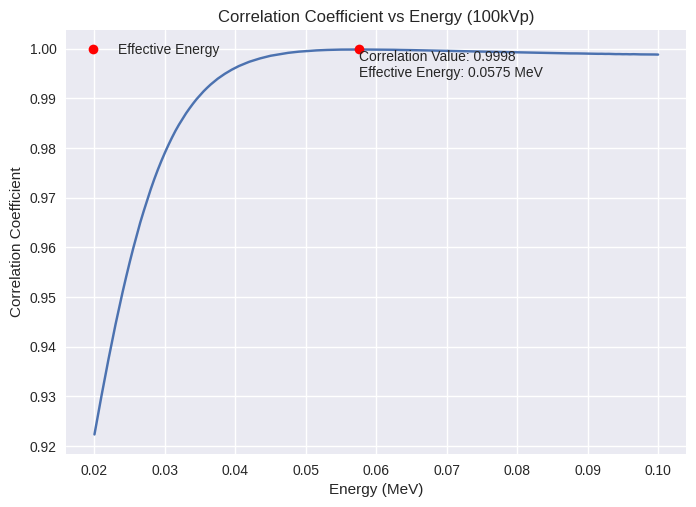

Correlation Value: 0.9998084640248662
Effective Energy: 0.0575 MeV
Energy Level: 100kVp


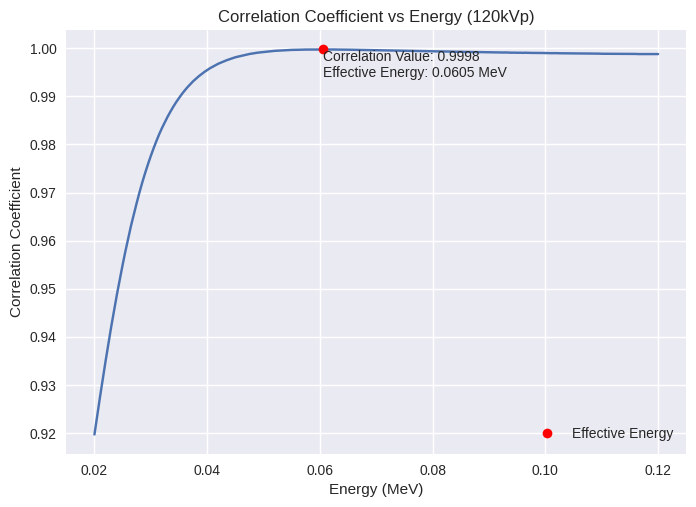

Correlation Value: 0.9997549538034098
Effective Energy: 0.0605 MeV
Energy Level: 120kVp


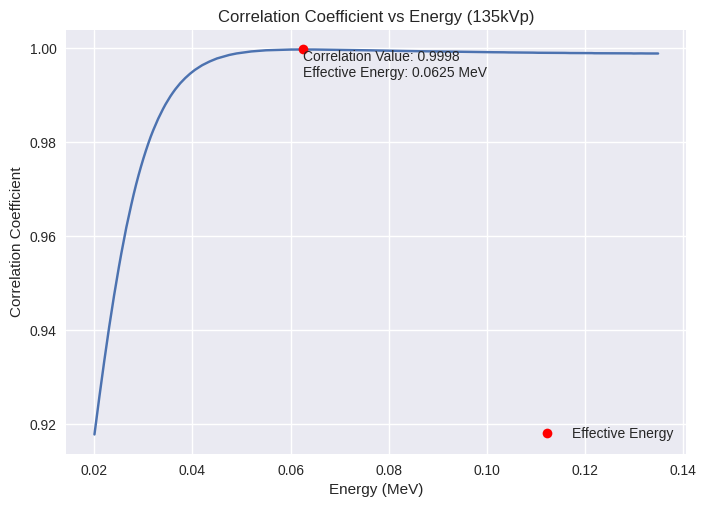

Correlation Value: 0.9997774163491602
Effective Energy: 0.0625 MeV
Energy Level: 135kVp


In [ ]:
#consolidating graphs for all of them here..can run linear regression on them individually in other cells
#feel free to experiment with the other plot themes..using seaborn for now

energy_levels = ['80kVp', '100kVp', '120kVp', '135kVp']

for level in energy_levels:
  energy = attenuation_data[level]['PMMA']['Energy']
  new_array = [energy,
                linear_attenuation_data[level]['PMMA'],
                linear_attenuation_data[level]['Air'],
                linear_attenuation_data[level]['Water'],
                linear_attenuation_data[level]['Polyethylene']]
  new_array = np.transpose(new_array)

  CT_values = np.array([CT_data[level]['PMMA'],
                        CT_data[level]['Air'],
                        CT_data[level]['Water'],
                        CT_data[level]['Polyethylene']])
  r_values = []

  for i in range(len(new_array)):
    y = CT_values
    x = new_array[i][1:]
    correlation, p_value = pearsonr(x, y)
    r_values.append(correlation)
  plt.style.use('seaborn-v0_8') #switch other styles if you want
  plt.figure()

  plt.plot(energy, r_values)
  plt.xlabel('Energy (MeV)')
  plt.ylabel('Correlation Coefficient')
  plt.title(f'Correlation Coefficient vs Energy ({level})')

  max_r_index = r_values.index(max(r_values))
  plt.plot(energy[max_r_index], r_values[max_r_index], 'ro', label='Effective Energy')

  #add text with correlation value and effective energy
  plt.text(energy[max_r_index], r_values[max_r_index], f'Correlation Value: {max(r_values):.4f}\nEffective Energy: {energy[max_r_index]:.4f} MeV', ha='left', va='top')

  plt.legend()
  plt.show()

  print(f'Correlation Value: {max(r_values)}')
  print(f'Effective Energy: {energy[max_r_index]} MeV')
  print(f'Energy Level: {level}')

Energy Level: 80kVp
Slope: 0.00021981
Intercept: 0.22001575
St. Dev.: 0.00000332


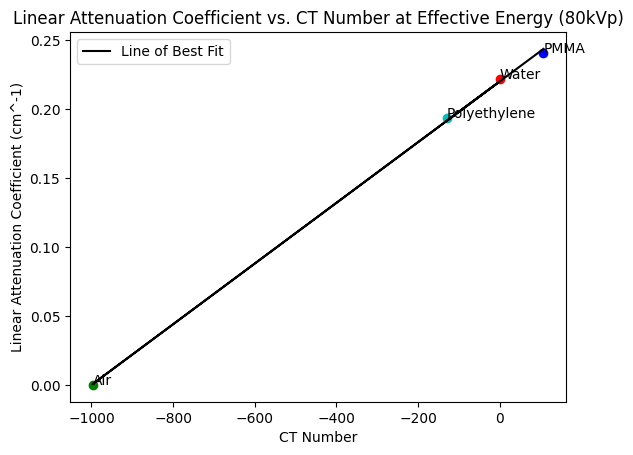

Energy Level: 100kVp
Slope: 0.00020874
Intercept: 0.20880289
St. Dev.: 0.00000289


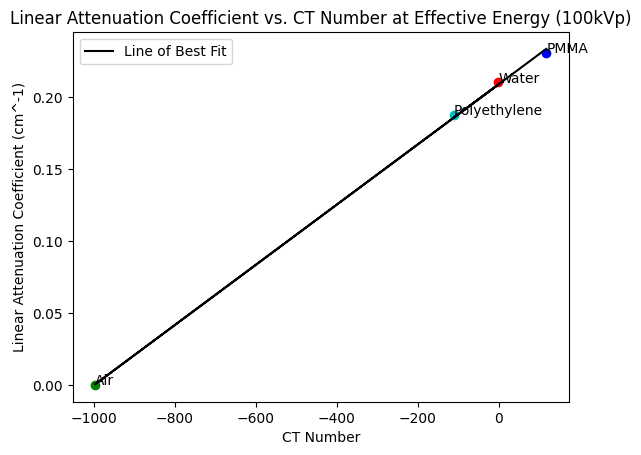

Energy Level: 120kVp
Slope: 0.00020364
Intercept: 0.20390499
St. Dev.: 0.00000319


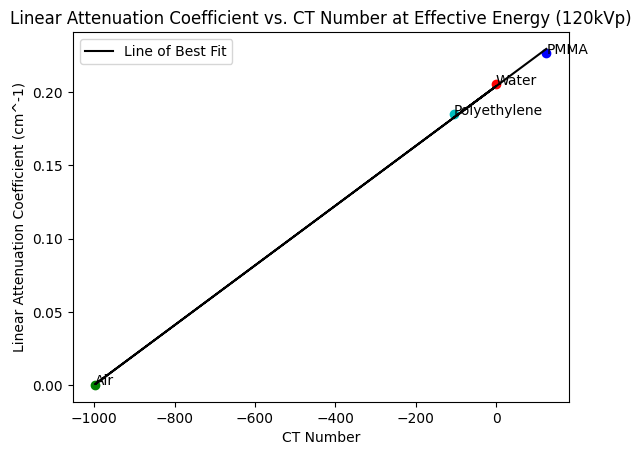

Energy Level: 135kVp
Slope: 0.00020149
Intercept: 0.20144466
St. Dev.: 0.00000301


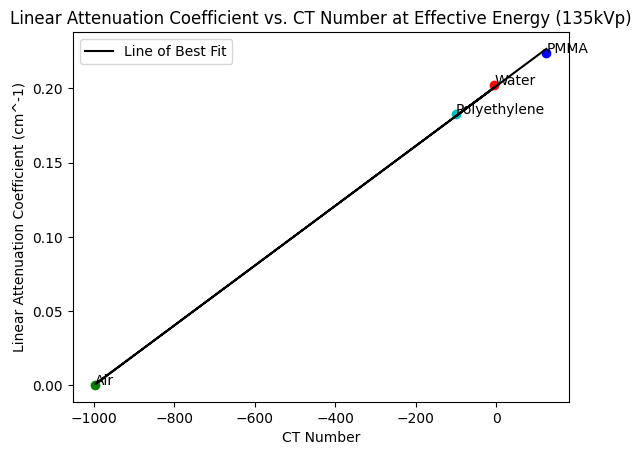

In [ ]:
energy_levels = ['80kVp', '100kVp', '120kVp', '135kVp']
colors = ['b', 'g', 'r', 'c']

for level in energy_levels:
  energy = attenuation_data[level]['PMMA']['Energy']
  new_array = [energy,
                linear_attenuation_data[level]['PMMA'],
                linear_attenuation_data[level]['Air'],
                linear_attenuation_data[level]['Water'],
                linear_attenuation_data[level]['Polyethylene']]
  new_array = np.transpose(new_array)

  CT_values = np.array([CT_data[level]['PMMA'],
                        CT_data[level]['Air'],
                        CT_data[level]['Water'],
                        CT_data[level]['Polyethylene']])

  # Find the effective energy
  r_values = []
  for i in range(len(new_array)):
    y = CT_values
    x = new_array[i][1:]
    correlation, p_value = pearsonr(x, y)
    r_values.append(correlation)

  max_r_index = r_values.index(max(r_values))
  effective_energy_index = max_r_index

  linear_attenuation_at_effective_energy = new_array[effective_energy_index][1:]

  # Linear Regression
  slope, intercept, r_value, p_value, std_err = linregress(CT_values, linear_attenuation_at_effective_energy)

  print(f"Energy Level: {level}")
  print(f"Slope: {slope:.8f}")
  print(f"Intercept: {intercept:.8f}")
  print(f"St. Dev.: {std_err:.8f}")


  plt.figure()

  for i in range(len(CT_values)):
    plt.plot(CT_values[i], linear_attenuation_at_effective_energy[i], 'o', color=colors[i])


  plt.plot(CT_values, slope * CT_values + intercept, 'k-', label='Line of Best Fit')

  plt.ylabel('Linear Attenuation Coefficient (cm^-1)')
  plt.xlabel('CT Number')
  plt.title(f'Linear Attenuation Coefficient vs. CT Number at Effective Energy ({level})')

  material_labels = ['PMMA', 'Air', 'Water', 'Polyethylene']
  for i, txt in enumerate(material_labels): #indexes every material
    plt.annotate(txt, (CT_values[i], linear_attenuation_at_effective_energy[i]))

  plt.legend()
  plt.show()

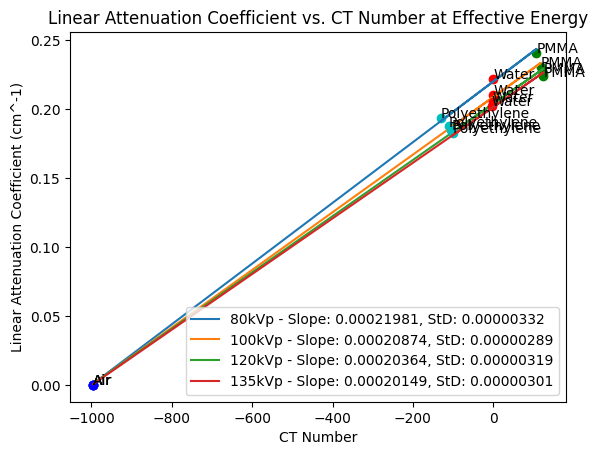

In [ ]:
#Remove air for clarity, if we keep it in it won't look like papers graphs as it will all start at same point
#we are using MeV for our energy

plt.figure()
energy_levels = ['80kVp', '100kVp', '120kVp', '135kVp']
colors = ['b', 'g', 'r', 'c']

for level in energy_levels:
  energy = attenuation_data[level]['PMMA']['Energy']
  new_array = [energy,
                linear_attenuation_data[level]['Air'],
                linear_attenuation_data[level]['PMMA'],
                linear_attenuation_data[level]['Water'],
                linear_attenuation_data[level]['Polyethylene']]
  new_array = np.transpose(new_array)

  CT_values = np.array([CT_data[level]['Air'],
                        CT_data[level]['PMMA'],
                        CT_data[level]['Water'],
                        CT_data[level]['Polyethylene']])


  r_values = []
  for i in range(len(new_array)):
    y = CT_values
    x = new_array[i][1:]
    correlation, p_value = pearsonr(x, y)
    r_values.append(correlation)

  max_r_index = r_values.index(max(r_values))
  effective_energy_index = max_r_index

  linear_attenuation_at_effective_energy = new_array[effective_energy_index][1:]


  slope, intercept, r_value, p_value, std_err = linregress(CT_values, linear_attenuation_at_effective_energy)


  for i in range(len(CT_values)):
    plt.plot(CT_values[i], linear_attenuation_at_effective_energy[i], 'o', color=colors[i])


  plt.plot(CT_values, slope * CT_values + intercept, '-', label=f'{level} - Slope: {slope:.8f}, StD: {std_err:.8f}')

  material_labels = ['Air','PMMA', 'Water', 'Polyethylene']
  for i, txt in enumerate(material_labels):
    plt.annotate(txt, (CT_values[i], linear_attenuation_at_effective_energy[i]))

plt.ylabel('Linear Attenuation Coefficient (cm^-1)')
plt.xlabel('CT Number')
plt.title(f'Linear Attenuation Coefficient vs. CT Number at Effective Energy')

plt.legend()
plt.show()

In [ ]:
# generate table in latex format to make it look good
materialdata = {
    "Material": ["Air","Water","PMMA","Polyethylene"],
    "Density": [air_density,water_density,pmma_density,polye_density],
    "Chemical Formula": ["H\u2082O","N\u2082,O\u2082,Ar","C\u2085H\u2088O\u2082","C\u2082H\u2084"]
}

material_df = pd.DataFrame(materialdata)

material_latex = material_df.to_latex(index=False, escape = False,caption = "Material Data", column_format = "|1|1|1|", float_format = "{:0.2f}".format)

print(material_latex)

\begin{table}
\caption{Material Data}
\begin{tabular}{|1|1|1|}
\toprule
Material & Density & Chemical Formula \\
\midrule
Air & 0.00 & H₂O \\
Water & 1.00 & N₂,O₂,Ar \\
PMMA & 1.18 & C₅H₈O₂ \\
Polyethylene & 0.94 & C₂H₄ \\
\bottomrule
\end{tabular}
\end{table}

